In [1]:
import numpy as np
import h5py

In [2]:
from keras.models import model_from_json

# Model reconstruction from JSON file
with open('model_Resnet50.json', 'r') as f:
    model = model_from_json(f.read())

# Load weights into the new model
model.load_weights('model_Resnet50.h5')

Using TensorFlow backend.


In [3]:
import matplotlib.pyplot as plt
from keras.applications.imagenet_utils import preprocess_input
from keras.preprocessing import image
import numpy as np
import os
import time
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.layers import GlobalAveragePooling2D, Dense, Dropout,Activation,Flatten

from keras.applications.imagenet_utils import preprocess_input
from keras.layers import Input
from keras.models import Model
from keras.utils import np_utils
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [4]:
PATH = os.getcwd()

# Define data path
data_path ='C:/TensorFlow/vgg16/train'
data_dir_list = os.listdir(data_path)[:5] # 5 classes

img_data_list=[]

for dataset in sorted(data_dir_list):
    img_list=os.listdir(data_path+'/'+ dataset)
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
    for img in img_list:
        img_path = data_path + '/'+ dataset + '/'+ img 
        img = image.load_img(img_path, target_size=(224, 224))
        x = image.img_to_array(img)
        x = preprocess_input(x)
        # print('Input image shape:', x.shape)
        img_data_list.append(x)
        
img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data /= 255
print (img_data.shape)

Loaded the images of dataset-Adult_leaf

Loaded the images of dataset-Child_leaf

Loaded the images of dataset-Defect_leaf

Loaded the images of dataset-Insect

Loaded the images of dataset-Perfect_leaf

(2600, 224, 224, 3)


In [5]:

# Define the number of classes
num_classes = 5
num_of_samples = (img_data.shape[0])
labels = np.ones((num_of_samples,), dtype='int64')

labels[0:325]=0
labels[325:1100]=1
labels[1100:1675]=2
labels[1675:1800]=3
labels[1800:]=4
	  
names = ['adult','child','defect','insect','perfect']


# convert class Labels to one-hot encoding
Y = np_utils.to_categorical(labels, num_classes)

Input image shape: (1, 224, 224, 3)
Image: 


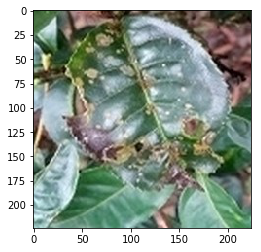


Prediction: 
adult: 	0.14129517367109656 %
child: 	3.105285204946995 %
defect: 	38.77011239528656 %
insect: 	0.07062488584779203 %
perfect: 	57.91268348693848 %


In [24]:
img_path = 'C:/TensorFlow/vgg16/test/defect/Image1_53.jpg'
img = image.load_img(img_path, target_size=(224,224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
print('Input image shape:', x.shape)

preds = model.predict(x)

print('Image: ')
plt.imshow(img)
plt.show()

print('\nPrediction: ')
preds = preds[0]
for i in range(len(preds)):
    print(names[i] + ': \t{} %'.format(preds[i]*100))

In [7]:
# Shuffle the dataset
x, y= shuffle(img_data, Y, random_state=2)
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [8]:
from sklearn.metrics import classification_report,confusion_matrix
import itertools
%matplotlib inline
Y_pred = model.predict(X_test)
#print(Y_pred)
y_pred = np.argmax(Y_pred, axis=1)
#print(y_pred)
#y_pred = model.predict_classes(X_test)
#print(y_pred)
target_names = ['class 0(adult)', 'class 1(child)', 'class 2(defect)','class 3(insect)', 'class 4(perfect)']

print(confusion_matrix(np.argmax(y_test,axis=1), y_pred))
print(classification_report(np.argmax(y_test,axis=1), y_pred,target_names=target_names))

[[ 64   0   0   0   0]
 [150   0   0   0   0]
 [103   0   0   0   0]
 [ 20   0   0   0   0]
 [183   0   0   0   0]]
                  precision    recall  f1-score   support

  class 0(adult)       0.12      1.00      0.22        64
  class 1(child)       0.00      0.00      0.00       150
 class 2(defect)       0.00      0.00      0.00       103
 class 3(insect)       0.00      0.00      0.00        20
class 4(perfect)       0.00      0.00      0.00       183

       micro avg       0.12      0.12      0.12       520
       macro avg       0.02      0.20      0.04       520
    weighted avg       0.02      0.12      0.03       520



C:\Users\Hasibul Hasan\AppData\Local\conda\conda\envs\evn\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
